# 1.3 Exercício Intermediário 1

In [37]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
def euclidean_distance(x, y):
    if len(x) != len(y):
        raise ValueError("x and y must have the same dimension")
    return np.sqrt(sum((xi - yi) ** 2 for xi, yi in zip(x, y)))

def knn(X_train, y_train, X_test, k):

  y_pred = []
  Q = []
  for i in range(len(X_test)):
    distances = []
    for j in range(len(X_train)):
      distances.append((euclidean_distance(X_test[i], X_train[j]), y_train[j]))
    distances.sort()
    neighbors = distances[:k]
    labels = [neighbor[1] for neighbor in neighbors]
    Q1 = 0
    Q2 = 0

    for label in labels:
      if label == 1:
        Q1 += 1
      elif label == 2:
        Q2 += 1

    Q.append((Q1,Q2))

    y_pred.append(int(max(set(labels), key=labels.count)))
  # print(Q)
  return Q , y_pred

# Q,y_pred = knn(X_train, y_train, X_test, 25)

In [4]:
def get_labels(Q, y_pred):
    blues = []
    reds = []
    for q,pred in zip(Q,y_pred):

        if pred == 1:
            blues.append(q)
        else:
            reds.append(q)

    return blues,reds    

In [5]:
def plot_predictions(blues,reds):

    xb,yb = zip(*blues)
    xr,yr = zip(*reds)
    plt.figure(figsize=(8,8))
    plt.scatter(xb,yb, color = 'blue', marker='o')
    plt.scatter(xr,yr, color = 'red', marker='o')
    line = np.linspace(6, 18, 100)
    plt.plot(line, line, color="black", linestyle="-", label="y = x")
    plt.title("Previsões no plano Q1xQ2")
    plt.xlabel('Q2')
    plt.ylabel('Q1')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return None

In [6]:
def accuracy_percentage(y_pred, y_test):
    if len(y_pred) != len(y_test):
        raise ValueError("As listas devem ter o mesmo tamanho.")
    
    acertos = sum(yp == yt for yp, yt in zip(y_pred, y_test))
    total = len(y_test)
    return (acertos / total) * 100


####  Escolha um conjunto de dados real, determine um valor inicial para k, separe os dados em dois conjuntos, sendo um de referência para  o KNN (treinamento) e outro de validação e avalie o percentual de acerto do KNN no conjunto de validação para este valor de k e partição atual do conjunto de dados. Repita esta operação pelo menos 10 e armazene a média e o desvio padrão do desempenho para este valor de k.

##### Escolhi k = 3!

Test size = 0.1 → Accuracy = 100.0
Test size = 0.11 → Accuracy = 100.0
Test size = 0.11 → Accuracy = 100.0
Test size = 0.12 → Accuracy = 100.0
Test size = 0.12 → Accuracy = 100.0
Test size = 0.13 → Accuracy = 100.0
Test size = 0.13 → Accuracy = 100.0
Test size = 0.14 → Accuracy = 100.0
Test size = 0.14 → Accuracy = 100.0
Test size = 0.15 → Accuracy = 100.0
Test size = 0.15 → Accuracy = 100.0
Test size = 0.16 → Accuracy = 100.0
Test size = 0.16 → Accuracy = 100.0
Test size = 0.17 → Accuracy = 100.0
Test size = 0.17 → Accuracy = 100.0
Test size = 0.18 → Accuracy = 100.0
Test size = 0.18 → Accuracy = 100.0
Test size = 0.19 → Accuracy = 100.0
Test size = 0.19 → Accuracy = 100.0
Test size = 0.2 → Accuracy = 100.0
Test size = 0.2 → Accuracy = 100.0
Test size = 0.21 → Accuracy = 100.0
Test size = 0.21 → Accuracy = 100.0
Test size = 0.22 → Accuracy = 100.0
Test size = 0.22 → Accuracy = 100.0
Test size = 0.23 → Accuracy = 100.0
Test size = 0.23 → Accuracy = 100.0
Test size = 0.24 → Accuracy = 9

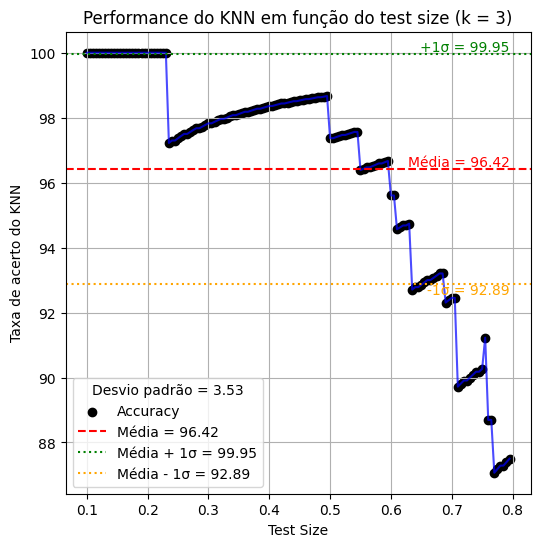

In [53]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

df['class'] = df['class'].apply(lambda x: -1 if x in [0,2] else 1)

df = df.sample(frac=1, random_state=42).reset_index(drop=True)

n = len(df)
k = 3
accuracy = []


for test_size in np.arange(0.1, 0.8, 0.005):
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=True, random_state=42
    )

    Q, y_pred = knn(X_train, y_train, X_test, k)
    blues, reds = get_labels(Q, y_pred)
    acc = accuracy_percentage(y_pred, y_test)
    accuracy.append(acc)

    print(f'Test size = {round(test_size,2)} → Accuracy = {round(acc,2)}')

xgrid = np.arange(0.1, 0.8, 0.005)
mean = np.mean(accuracy)
std = np.std(accuracy)

plt.figure(figsize=(6,6))
plt.scatter(xgrid, accuracy, color='black', marker='o', label="Accuracy")
plt.plot(xgrid, accuracy, color="blue", linestyle="-", alpha=0.7)


plt.axhline(mean, color='red', linestyle='--', label=f"Média = {mean:.2f}")
plt.axhline(mean + std, color='green', linestyle=':', label=f"Média + 1σ = {mean + std:.2f}")
plt.axhline(mean - std, color='orange', linestyle=':', label=f"Média - 1σ = {mean - std:.2f}")

plt.text(xgrid[-1], mean + std, f"+1σ = {mean + std:.2f}", color='green', va='bottom', ha='right')
plt.text(xgrid[-1], mean - std, f"-1σ = {mean - std:.2f}", color='orange', va='top', ha='right')
plt.text(xgrid[-1], mean, f"Média = {mean:.2f}", color='red', va='bottom', ha='right')


plt.title(f'Performance do KNN em função do test size (k = {k})')
plt.xlabel('Test Size')
plt.ylabel("Taxa de acerto do KNN")
plt.legend(title=f"Desvio padrão = {std:.2f}", loc='lower left')
plt.grid(True)
plt.show()

#### Varie o valor de k de 1 a um valor mais alto que permita a observação da mudança de comportamento do desempenho do modelo, possivelmente passando por um máximo.
#### Vamos selecionar um test size de 0.6 pois é o valor que está na média para k = 3.

90.0
k = 1 → Accuracy = 93.33
k = 2 → Accuracy = 91.11
k = 3 → Accuracy = 96.67
k = 4 → Accuracy = 91.11
k = 5 → Accuracy = 95.56
k = 6 → Accuracy = 92.22
k = 7 → Accuracy = 93.33
k = 8 → Accuracy = 90.0
k = 9 → Accuracy = 90.0
k = 10 → Accuracy = 87.78
k = 11 → Accuracy = 88.89
k = 12 → Accuracy = 88.89
k = 13 → Accuracy = 88.89
k = 14 → Accuracy = 87.78
k = 15 → Accuracy = 88.89
k = 16 → Accuracy = 87.78
k = 17 → Accuracy = 87.78
k = 18 → Accuracy = 86.67
k = 19 → Accuracy = 88.89
k = 20 → Accuracy = 87.78
k = 21 → Accuracy = 87.78
k = 22 → Accuracy = 85.56
k = 23 → Accuracy = 87.78
k = 24 → Accuracy = 84.44
k = 25 → Accuracy = 85.56
k = 26 → Accuracy = 84.44
k = 27 → Accuracy = 86.67
k = 28 → Accuracy = 77.78
k = 29 → Accuracy = 80.0
k = 30 → Accuracy = 76.67
k = 31 → Accuracy = 80.0
k = 32 → Accuracy = 62.22
k = 33 → Accuracy = 62.22
k = 34 → Accuracy = 62.22
k = 35 → Accuracy = 62.22
k = 36 → Accuracy = 62.22
k = 37 → Accuracy = 62.22
k = 38 → Accuracy = 62.22
k = 39 → Accuracy = 

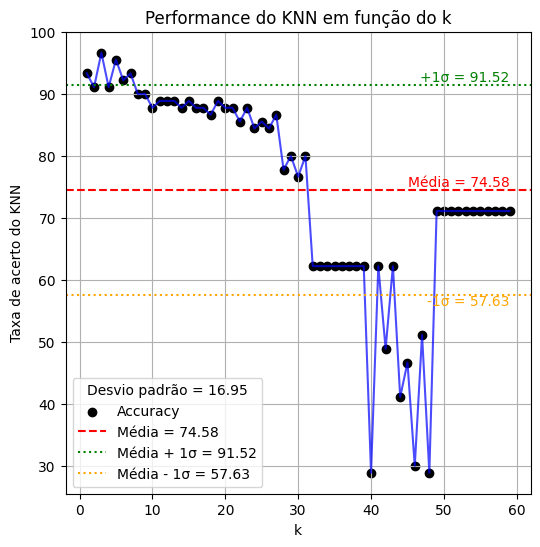

In [60]:
n = len(df)
accuracy = []

test_size = 0.6

print(n*test_size)

xgrid = range(1,60,1)

for k in xgrid:
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, shuffle=True, random_state=42
    )

    Q, y_pred = knn(X_train, y_train, X_test, k)
    blues, reds = get_labels(Q, y_pred)
    acc = accuracy_percentage(y_pred, y_test)
    accuracy.append(acc)

    print(f'k = {k} → Accuracy = {round(acc,2)}')

mean = np.mean(accuracy)
std = np.std(accuracy)

plt.figure(figsize=(6,6))
plt.scatter(xgrid, accuracy, color='black', marker='o', label="Accuracy")
plt.plot(xgrid, accuracy, color="blue", linestyle="-", alpha=0.7)


plt.axhline(mean, color='red', linestyle='--', label=f"Média = {mean:.2f}")
plt.axhline(mean + std, color='green', linestyle=':', label=f"Média + 1σ = {mean + std:.2f}")
plt.axhline(mean - std, color='orange', linestyle=':', label=f"Média - 1σ = {mean - std:.2f}")

plt.text(xgrid[-1], mean + std, f"+1σ = {mean + std:.2f}", color='green', va='bottom', ha='right')
plt.text(xgrid[-1], mean - std, f"-1σ = {mean - std:.2f}", color='orange', va='top', ha='right')
plt.text(xgrid[-1], mean, f"Média = {mean:.2f}", color='red', va='bottom', ha='right')


plt.title('Performance do KNN em função do k')
plt.xlabel('k')
plt.ylabel("Taxa de acerto do KNN")
plt.legend(title=f"Desvio padrão = {std:.2f}", loc='lower left')
plt.grid(True)
plt.show()

# 1.4 Exercício Intermediário 2